In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font family to Times New Roman


In [2]:
df_imagenet = pd.read_csv('./final_results/imagenet_results.csv')
df_cifar10 = pd.read_csv('./final_results/cifar10_results.csv')
df_cifar100 = pd.read_csv('./final_results/cifar100_results.csv')

In [3]:
def get_ece_15_bins(ece_str):
    ece_data = eval(ece_str)
    for ece_entry in ece_data:
        if ece_entry['n_bins'] == 15:
            return ece_entry['result']
    return None

In [4]:
def get_value_15_bins(metric_str, metric_name):
    try:
        metric_data_list = eval(metric_str)
    except Exception as e:
        print(f"Error while evaluating metric_str: {e}")
        return None

    if metric_name in ['KSCE', 'KDECE', 'MMCE', 'NLL', 'brier']:
        try:
            if isinstance(metric_data_list, dict) and 'result' in metric_data_list:
                return metric_data_list['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            return None

    for metric_data in metric_data_list:
        try:
            if 'n_bins' in metric_data and metric_data['n_bins'] == 15:
                return metric_data['result']
            elif 'num_bins' in metric_data and metric_data['num_bins'] == 15:
                return metric_data['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            continue

    return None

In [5]:
df_imagenet.columns

Index(['config', 'info', 'dataset', 'arch', 'ece', 'sce', 'tace', 'ace', 'MCE',
       'cwECE', 'Marginal_CE_debias', 'Marginal_CE', 'ECE_em', 'Ole', 'KSCE',
       'KDECE', 'MMCE', 'NLL', 'brier', 'timestamp'],
      dtype='object')

In [6]:
metrics_to_extract = [
    'ece', 'ECE_em', 'cwECE', 'ace', 'KSCE', 'KDECE', 'MMCE', 'NLL', 'brier'
]

df_imagenet = df_imagenet[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar10 = df_cifar10[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar100 = df_cifar100[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
# 
metrics_to_extract = [
    'ECE', 'ECE_em', 'cwCE', 'cwCE_em', 'KSCE', 'KDECE', 'MMCE', 'NLL', 'brier'
]
df_imagenet.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar10.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar100.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
for metric in metrics_to_extract:
    for dataset, df in [('imagenet', df_imagenet), ('cifar10', df_cifar10), ('cifar100', df_cifar100)]:
        column_name = f"{metric}_{dataset}"
        df[column_name] = df[metric].apply(lambda x: get_value_15_bins(x, metric))

In [7]:
merged_df = df_imagenet[['config'] + [f"{metric}_imagenet" for metric in metrics_to_extract]].merge(
    df_cifar10[['config'] + [f"{metric}_cifar10" for metric in metrics_to_extract]], on='config', how='outer'
).merge(
    df_cifar100[['config'] + [f"{metric}_cifar100" for metric in metrics_to_extract]], on='config', how='outer'
)

In [8]:
merged_df = merged_df.fillna(0)

In [9]:
merged_df

,config,ECE_imagenet,ECE_em_imagenet,cwCE_imagenet,cwCE_em_imagenet,KSCE_imagenet,KDECE_imagenet,MMCE_imagenet,NLL_imagenet,brier_imagenet,...,brier_cifar10,ECE_cifar100,ECE_em_cifar100,cwCE_cifar100,cwCE_em_cifar100,KSCE_cifar100,KDECE_cifar100,MMCE_cifar100,NLL_cifar100,brier_cifar100
0,0,0.013479,0.014891,0.002200,0.002134,0.009119,0.016285,0.007055,2.963478,0.007052,...,0.022633,0.062435,0.062435,0.002781,0.001919,0.062497,0.061040,0.048246,1.830587,0.006290
1,1,0.092726,0.092726,0.003150,0.001994,0.092728,0.090597,0.069272,2.222881,0.005797,...,0.011759,0.145993,0.145488,0.003650,0.001487,0.145495,0.139337,0.116523,1.418364,0.004577
2,2,0.014164,0.015447,0.002181,0.002195,0.007434,0.014924,0.004274,2.990550,0.007057,...,0.021973,0.061576,0.061576,0.002782,0.001888,0.061602,0.059760,0.047387,1.774595,0.006115
3,3,0.016188,0.014983,0.002250,0.002160,0.006463,0.012710,0.004177,2.921413,0.006977,...,0.021029,0.027331,0.026948,0.002528,0.001670,0.025442,0.023779,0.019127,1.586426,0.005642
4,4,0.021022,0.025559,0.002518,0.002045,0.020940,0.021253,0.016235,2.777399,0.006771,...,0.019510,0.029152,0.028074,0.002337,0.001518,0.028126,0.027943,0.021330,1.486437,0.005408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,3101,0.036924,0.036924,0.002655,0.001955,0.037223,0.037605,0.027178,2.454602,0.006269,...,0.016432,0.103534,0.103534,0.002941,0.001393,0.103538,0.098700,0.079750,1.346512,0.004837
6462,3103,0.063616,0.065159,0.002854,0.001944,0.063618,0.063317,0.047986,2.454972,0.006257,...,0.014484,0.142719,0.142450,0.003579,0.001533,0.142456,0.136930,0.112751,1.459952,0.004898
6463,3106,0.045512,0.045512,0.002601,0.002019,0.045572,0.047630,0.034195,2.576253,0.006458,...,0.017690,0.139669,0.139546,0.003663,0.001789,0.139549,0.133810,0.109784,1.527903,0.005155
6464,3107,0.022501,0.020349,0.002253,0.002315,0.019143,0.024368,0.015723,3.048522,0.007107,...,0.021364,0.072576,0.071713,0.002700,0.001661,0.071719,0.069699,0.054973,1.660412,0.005766


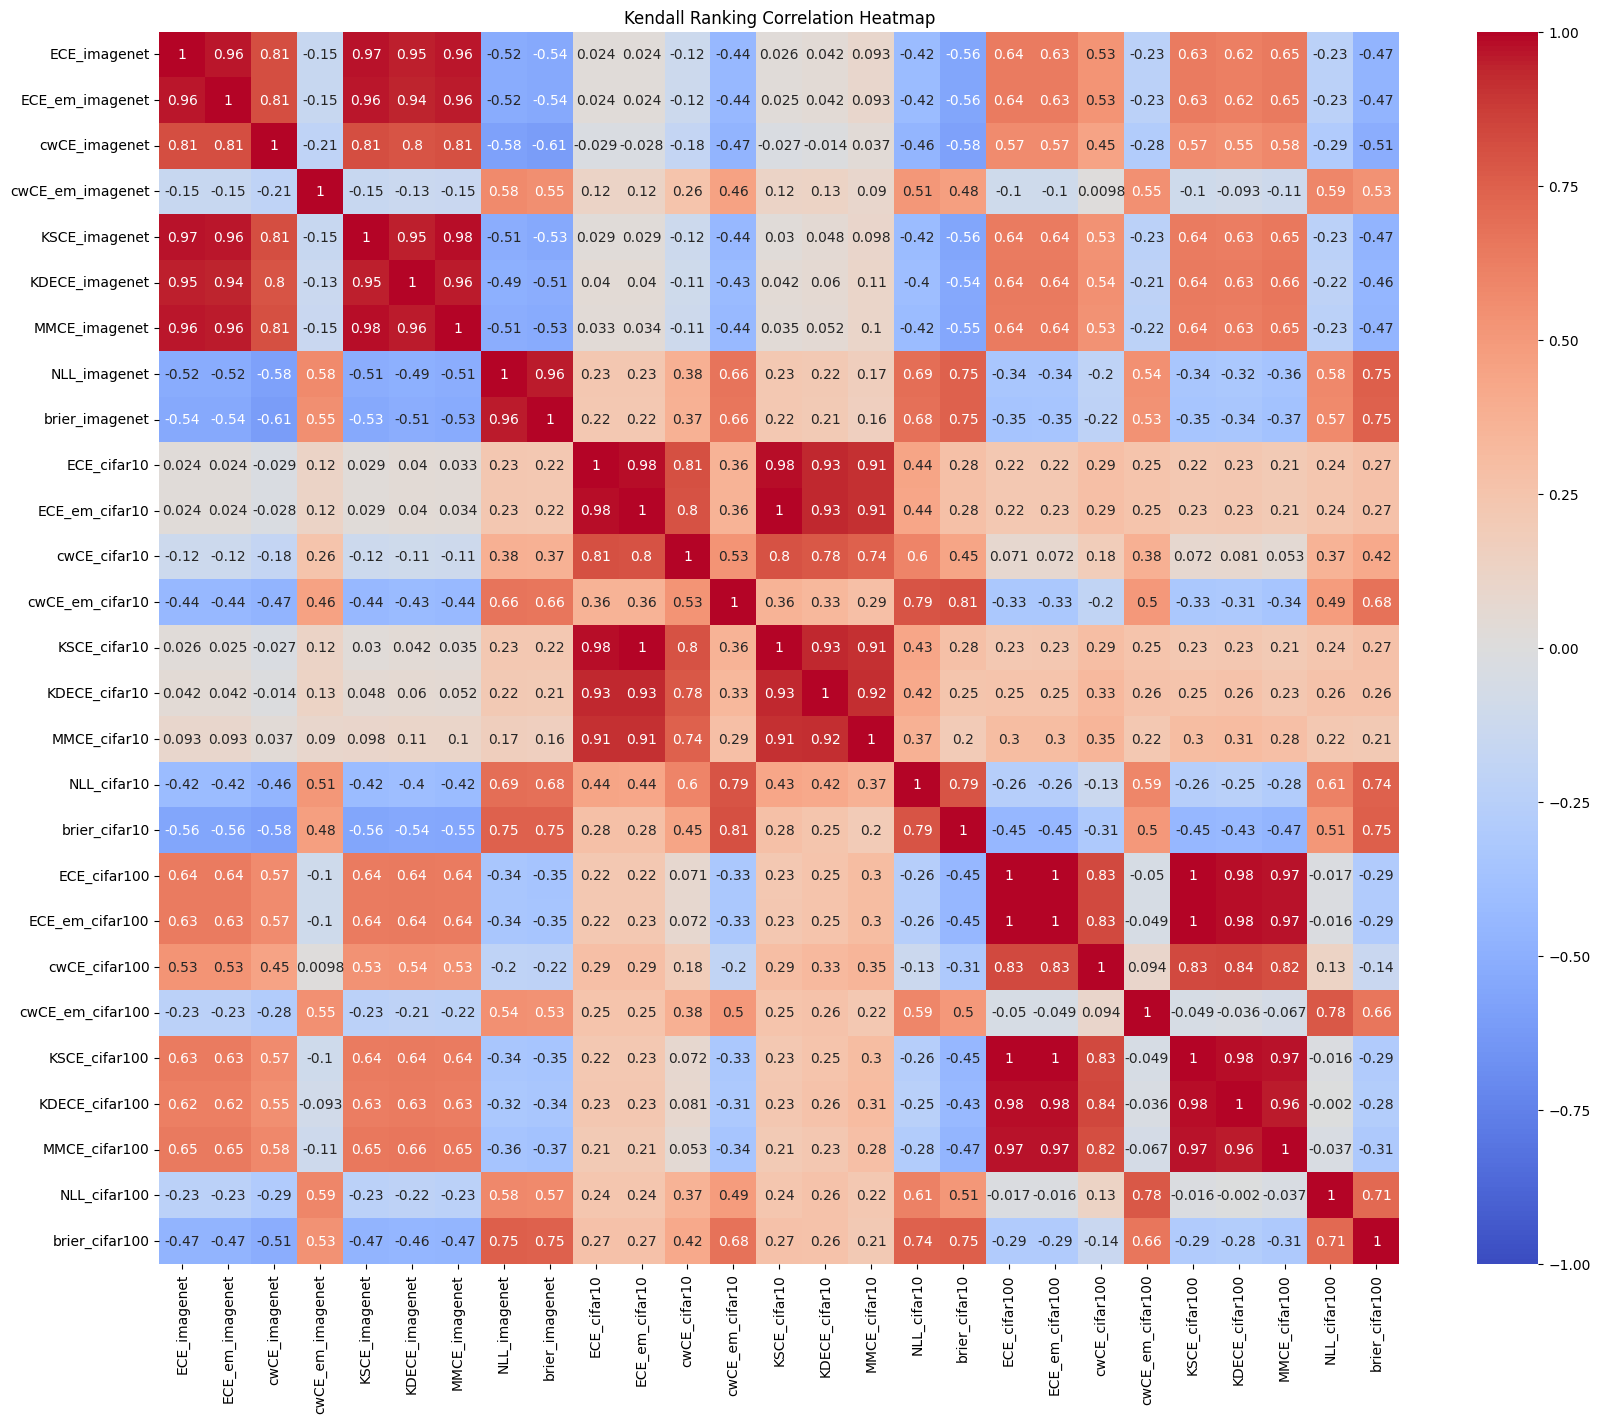

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Create new columns with the ranking of each metric for config
for metric in metrics_to_extract:
    for dataset in ['imagenet', 'cifar10', 'cifar100']:
        column_name = f"{metric}_{dataset}"
        rank_column_name = f"{metric}_{dataset}"
        merged_df[rank_column_name] = merged_df[column_name].rank(method='dense', ascending=False)

# Calculate the Kendall ranking correlation matrix for the metric rankings
rank_columns = [f"{metric}_{dataset}" for dataset in ['imagenet', 'cifar10', 'cifar100'] for metric in metrics_to_extract]
corr_matrix = pd.DataFrame(index=rank_columns, columns=rank_columns)

for col1 in rank_columns:
    for col2 in rank_columns:
        corr, _ = kendalltau(merged_df[col1], merged_df[col2])
        corr_matrix.loc[col1, col2] = corr

# Create a correlation heatmap using seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall Ranking Correlation Heatmap")
# plt.savefig("fig/Kendall_Metric.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font family to Times New Roman


In [19]:
df_imagenet = pd.read_csv('./final_results/sss/imagenet_sss.csv')
df_cifar10 = pd.read_csv('./final_results/sss/cifar10_sss.csv')
df_cifar100 = pd.read_csv('./final_results/sss/cifar100_sss.csv')

In [20]:
df_cifar10.columns

Index(['config', 'info', 'dataset', 'arch', 'ece', 'ece_em', 'cwECE',
       'cwECE_em', 'timestamp'],
      dtype='object')

In [21]:


def get_ece_15_bins(ece_str):
    ece_data = eval(ece_str)
    for ece_entry in ece_data:
        if ece_entry['n_bins'] == 15:
            return ece_entry['result']
    return None

def get_value_15_bins(metric_str, metric_name):
    try:
        metric_data_list = eval(metric_str)
    except Exception as e:
        print(f"Error while evaluating metric_str: {e}")
        return None

    if metric_name in ['KSCE', 'KDECE', 'MMCE', 'NLL', 'brier']:
        try:
            if isinstance(metric_data_list, dict) and 'result' in metric_data_list:
                return metric_data_list['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            return None

    for metric_data in metric_data_list:
        try:
            if 'n_bins' in metric_data and metric_data['n_bins'] == 15:
                return metric_data['result']
            elif 'num_bins' in metric_data and metric_data['num_bins'] == 15:
                return metric_data['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            continue

    return None

In [22]:
metrics_to_extract = [
    'ece', 'ece_em', 'cwECE',
       'cwECE_em'
]

df_imagenet = df_imagenet[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar10 = df_cifar10[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar100 = df_cifar100[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
# 
metrics_to_extract = [
    'ECE', 'ECE_em', 'cwCE',
       'cwCE_em'
]
df_imagenet.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar10.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar100.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
for metric in metrics_to_extract:
    for dataset, df in [('imagenet', df_imagenet), ('cifar10', df_cifar10), ('cifar100', df_cifar100)]:
        column_name = f"{metric}_{dataset}"
        df[column_name] = df[metric].apply(lambda x: get_value_15_bins(x, metric))

In [23]:
merged_df = df_imagenet[['config'] + [f"{metric}_imagenet" for metric in metrics_to_extract]].merge(
    df_cifar10[['config'] + [f"{metric}_cifar10" for metric in metrics_to_extract]], on='config', how='outer'
).merge(
    df_cifar100[['config'] + [f"{metric}_cifar100" for metric in metrics_to_extract]], on='config', how='outer'
)

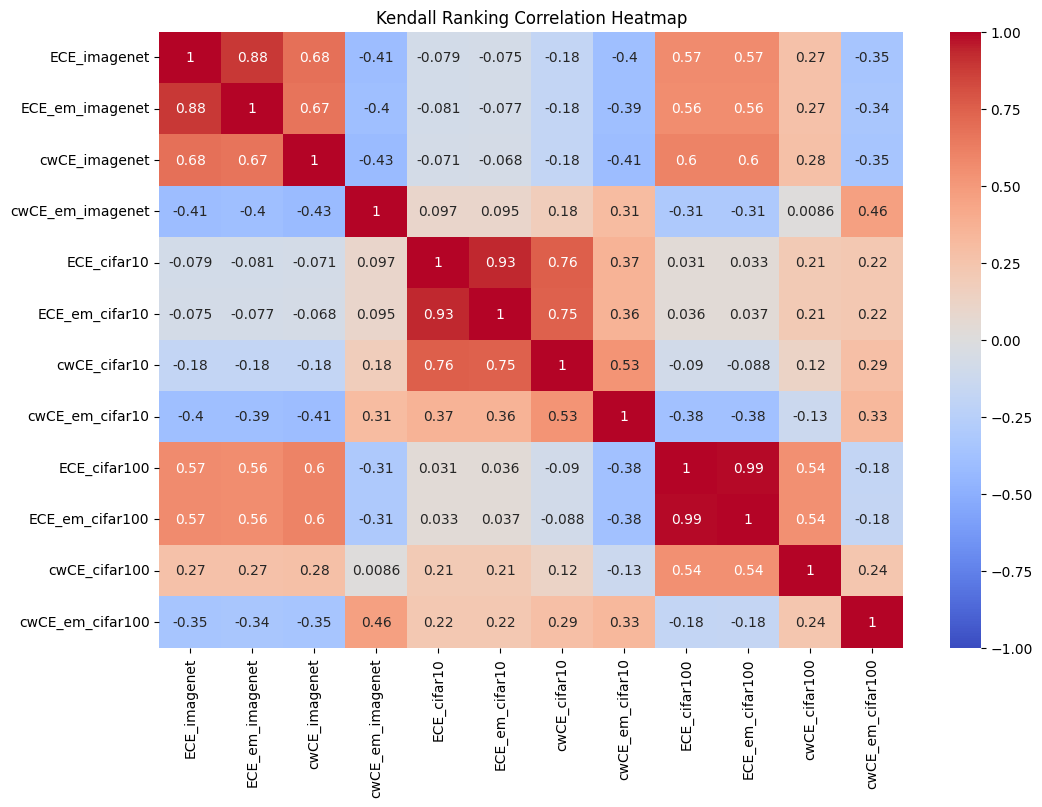

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Create new columns with the ranking of each metric for config
for metric in metrics_to_extract:
    for dataset in ['imagenet', 'cifar10', 'cifar100']:
        column_name = f"{metric}_{dataset}"
        rank_column_name = f"{metric}_{dataset}"
        merged_df[rank_column_name] = merged_df[column_name].rank(method='dense', ascending=False)

# Calculate the Kendall ranking correlation matrix for the metric rankings
rank_columns = [f"{metric}_{dataset}" for dataset in ['imagenet', 'cifar10', 'cifar100'] for metric in metrics_to_extract]
corr_matrix = pd.DataFrame(index=rank_columns, columns=rank_columns)

for col1 in rank_columns:
    for col2 in rank_columns:
        corr, _ = kendalltau(merged_df[col1], merged_df[col2])
        corr_matrix.loc[col1, col2] = corr

# Create a correlation heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall Ranking Correlation Heatmap")
# plt.savefig("fig/Kendall_Metric.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [30]:
merged_df

,config,ECE_imagenet,ECE_em_imagenet,cwCE_imagenet,cwCE_em_imagenet,ECE_cifar10,ECE_em_cifar10,cwCE_cifar10,cwCE_em_cifar10,ECE_cifar100,ECE_em_cifar100,cwCE_cifar100,cwCE_em_cifar100
0,32702,88.0,87.0,213.0,543.0,1560.0,1363.0,2034.0,2972.0,20.0,18.0,115.0,2945.0
1,27519,1950.0,1981.0,154.0,1594.0,2947.0,2908.0,2965.0,2927.0,440.0,426.0,280.0,1809.0
2,32615,1578.0,1571.0,1044.0,2435.0,2149.0,1923.0,2654.0,1451.0,424.0,475.0,478.0,527.0
3,32191,217.0,209.0,13.0,675.0,2509.0,2343.0,2520.0,1565.0,138.0,129.0,184.0,1598.0
4,32253,264.0,263.0,50.0,711.0,2172.0,1955.0,2434.0,2751.0,106.0,115.0,77.0,1198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,19197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1722.0,1691.0,1844.0,1678.0
4724,16822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2522.0,2556.0,2434.0,274.0
4725,19551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985.0,2985.0,2920.0,1224.0
4726,25279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2358.0,2338.0,2700.0,2111.0


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font family to Times New Roman

df_imagenet = pd.read_csv('./final_results/sss/imagenet_sss.csv')
df_cifar10 = pd.read_csv('./final_results/sss/cifar10_sss.csv')
df_cifar100 = pd.read_csv('./final_results/sss/cifar100_sss.csv')


def get_ece_15_bins(ece_str):
    ece_data = eval(ece_str)
    for ece_entry in ece_data:
        if ece_entry['n_bins'] == 15:
            return ece_entry['result']
    return None

def get_value_15_bins(metric_str, metric_name):
    try:
        metric_data_list = eval(metric_str)
    except Exception as e:
        print(f"Error while evaluating metric_str: {e}")
        return None

    if metric_name in ['KSCE', 'KDECE', 'MMCE', 'NLL', 'brier']:
        try:
            if isinstance(metric_data_list, dict) and 'result' in metric_data_list:
                return metric_data_list['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            return None

    for metric_data in metric_data_list:
        try:
            if 'n_bins' in metric_data and metric_data['n_bins'] == 15:
                return metric_data['result']
            elif 'num_bins' in metric_data and metric_data['num_bins'] == 15:
                return metric_data['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            continue

    return None

metrics_to_extract = [
    'ece', 'ece_em', 'cwECE',
       'cwECE_em'
]

df_imagenet = df_imagenet[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar10 = df_cifar10[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar100 = df_cifar100[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
# 
metrics_to_extract = [
    'ECE', 'ECE_em', 'cwCE',
       'cwCE_em'
]
df_imagenet.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar10.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar100.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
for metric in metrics_to_extract:
    for dataset, df in [('imagenet', df_imagenet), ('cifar10', df_cifar10), ('cifar100', df_cifar100)]:
        column_name = f"{metric}_{dataset}"
        df[column_name] = df[metric].apply(lambda x: get_value_15_bins(x, metric))



imagenet_ids = df_imagenet.sort_values('info', ascending=False).head(3000)['config']
cifar10_ids = df_cifar10.sort_values('info', ascending=False).head(3000)['config']
cifar100_ids = df_cifar100.sort_values('info', ascending=False).head(3000)['config']

ids = list(set(list(imagenet_ids) + list(cifar10_ids)+list(cifar100_ids)))

merged_df = df_imagenet[['config'] + [f"{metric}_imagenet" for metric in metrics_to_extract]].merge(
    df_cifar10[['config'] + [f"{metric}_cifar10" for metric in metrics_to_extract]], on='config', how='outer'
).merge(
    df_cifar100[['config'] + [f"{metric}_cifar100" for metric in metrics_to_extract]], on='config', how='outer'
)

plot_df = merged_df.loc[merged_df['config'].isin(ids)]

/tmp/ipykernel_1689806/3601988339.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[rank_column_name] = plot_df[column_name].rank(method='dense', ascending=False)


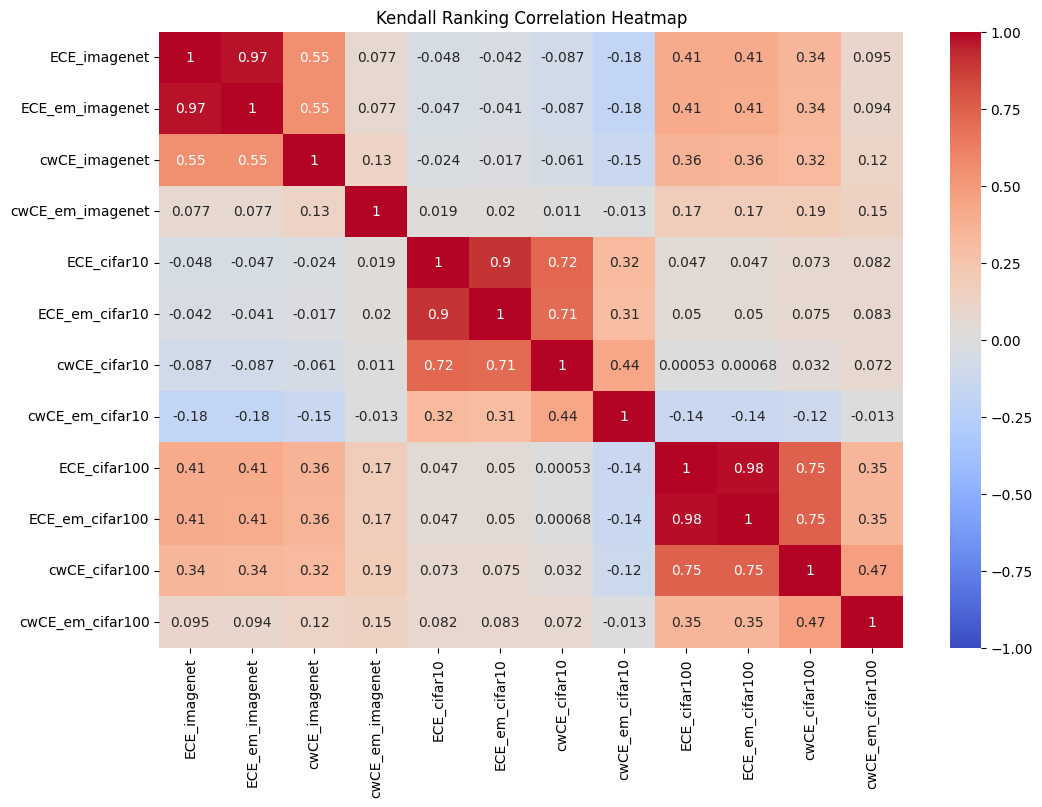

In [51]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Create new columns with the ranking of each metric for config
for metric in metrics_to_extract:
    for dataset in ['imagenet', 'cifar10', 'cifar100']:
        column_name = f"{metric}_{dataset}"
        rank_column_name = f"{metric}_{dataset}"
        plot_df[rank_column_name] = plot_df[column_name].rank(method='dense', ascending=False)

# Calculate the Kendall ranking correlation matrix for the metric rankings
rank_columns = [f"{metric}_{dataset}" for dataset in ['imagenet', 'cifar10', 'cifar100'] for metric in metrics_to_extract]
corr_matrix = pd.DataFrame(index=rank_columns, columns=rank_columns)

for col1 in rank_columns:
    for col2 in rank_columns:
        corr, _ = kendalltau(plot_df[col1], plot_df[col2])
        corr_matrix.loc[col1, col2] = corr

# Create a correlation heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall Ranking Correlation Heatmap")
# plt.savefig("fig/Kendall_Metric.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font family to Times New Roman

df_imagenet = pd.read_csv('./final_results/sss/imagenet_sss.csv')
df_cifar10 = pd.read_csv('./final_results/sss/cifar10_sss.csv')
df_cifar100 = pd.read_csv('./final_results/sss/cifar100_sss.csv')


def get_ece_15_bins(ece_str):
    ece_data = eval(ece_str)
    for ece_entry in ece_data:
        if ece_entry['n_bins'] == 15:
            return ece_entry['result']
    return None

def get_value_15_bins(metric_str, metric_name):
    try:
        metric_data_list = eval(metric_str)
    except Exception as e:
        print(f"Error while evaluating metric_str: {e}")
        return None

    if metric_name in ['KSCE', 'KDECE', 'MMCE', 'NLL', 'brier']:
        try:
            if isinstance(metric_data_list, dict) and 'result' in metric_data_list:
                return metric_data_list['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            return None

    for metric_data in metric_data_list:
        try:
            if 'n_bins' in metric_data and metric_data['n_bins'] == 15:
                return metric_data['result']
            elif 'num_bins' in metric_data and metric_data['num_bins'] == 15:
                return metric_data['result']
        except Exception as e:
            print(f"Error while processing metric_data: {e}")
            continue

    return None

metrics_to_extract = [
    'ece', 'ece_em', 'cwECE',
       'cwECE_em'
]

df_imagenet = df_imagenet[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar10 = df_cifar10[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
df_cifar100 = df_cifar100[['config', 'info', 'dataset', 'arch'] +metrics_to_extract]
# 
metrics_to_extract = [
    'ECE', 'ECE_em', 'cwCE',
       'cwCE_em'
]
df_imagenet.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar10.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
df_cifar100.columns = ['config', 'info', 'dataset', 'arch'] +metrics_to_extract
for metric in metrics_to_extract:
    for dataset, df in [('imagenet', df_imagenet), ('cifar10', df_cifar10), ('cifar100', df_cifar100)]:
        column_name = f"{metric}_{dataset}"
        df[column_name] = df[metric].apply(lambda x: get_value_15_bins(x, metric))




imagenet_ids = df_imagenet.sort_values('info', ascending=False).head(1000)['config']
cifar10_ids = df_cifar10.sort_values('info', ascending=False).head(1000)['config']
cifar100_ids = df_cifar100.sort_values('info', ascending=False).head(1000)['config']

ids = list(set(list(imagenet_ids) + list(cifar10_ids)+list(cifar100_ids)))

merged_df = df_imagenet[['config'] + [f"{metric}_imagenet" for metric in metrics_to_extract]].merge(
    df_cifar10[['config'] + [f"{metric}_cifar10" for metric in metrics_to_extract]], on='config', how='outer'
).merge(
    df_cifar100[['config'] + [f"{metric}_cifar100" for metric in metrics_to_extract]], on='config', how='outer'
)

plot_df = merged_df.loc[merged_df['config'].isin(ids)]

In [56]:
df_cifar10.sort_values('info', ascending=False).head(1000).columns

Index(['config', 'info', 'dataset', 'arch', 'ECE', 'ECE_em', 'cwCE', 'cwCE_em',
       'ECE_cifar10', 'ECE_em_cifar10', 'cwCE_cifar10', 'cwCE_em_cifar10'],
      dtype='object')

/tmp/ipykernel_1689806/3601988339.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df[rank_column_name] = plot_df[column_name].rank(method='dense', ascending=False)


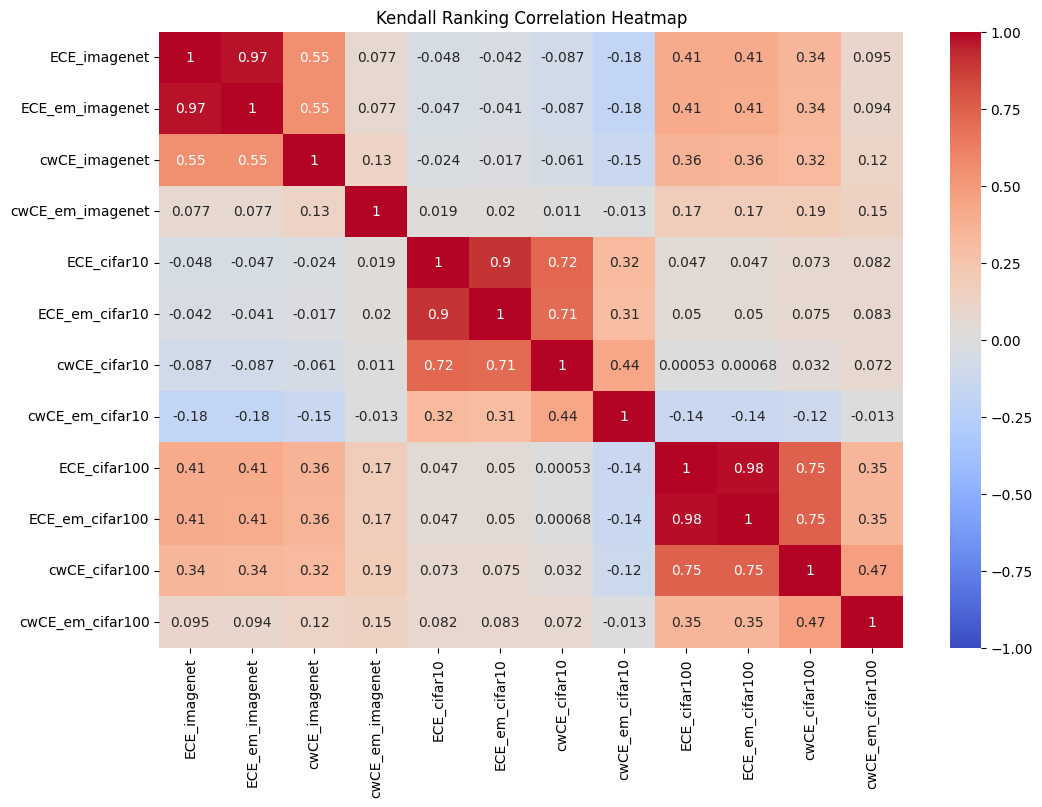

In [52]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Create new columns with the ranking of each metric for config
for metric in metrics_to_extract:
    for dataset in ['imagenet', 'cifar10', 'cifar100']:
        column_name = f"{metric}_{dataset}"
        rank_column_name = f"{metric}_{dataset}"
        plot_df[rank_column_name] = plot_df[column_name].rank(method='dense', ascending=False)

# Calculate the Kendall ranking correlation matrix for the metric rankings
rank_columns = [f"{metric}_{dataset}" for dataset in ['imagenet', 'cifar10', 'cifar100'] for metric in metrics_to_extract]
corr_matrix = pd.DataFrame(index=rank_columns, columns=rank_columns)

for col1 in rank_columns:
    for col2 in rank_columns:
        corr, _ = kendalltau(plot_df[col1], plot_df[col2])
        corr_matrix.loc[col1, col2] = corr

# Create a correlation heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall Ranking Correlation Heatmap")
# plt.savefig("fig/Kendall_Metric.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

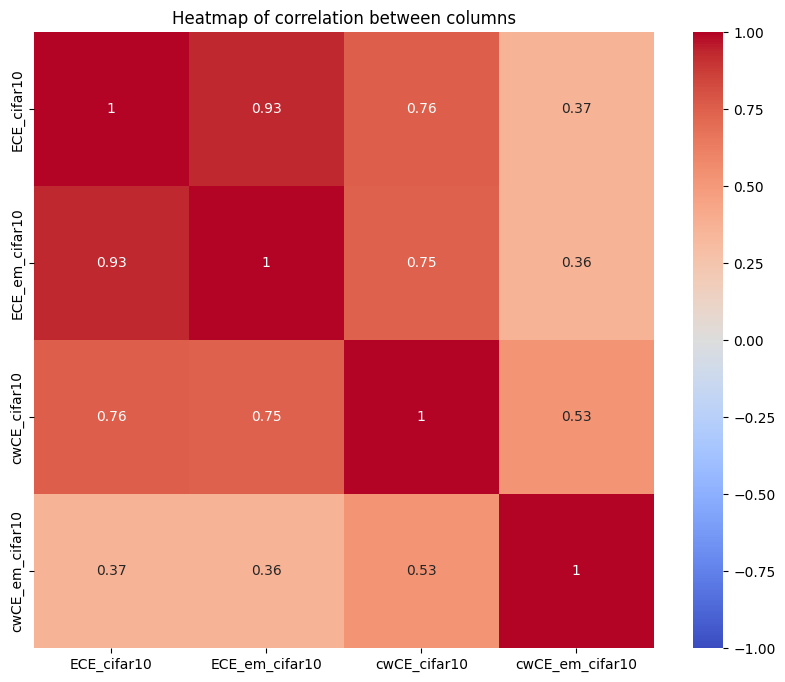

In [79]:


correlation_matrix = df_cifar10.sort_values('info', ascending=False).head(1000)[['ECE_cifar10', 'ECE_em_cifar10', 'cwCE_cifar10', 'cwCE_em_cifar10']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of correlation between columns')
plt.show()

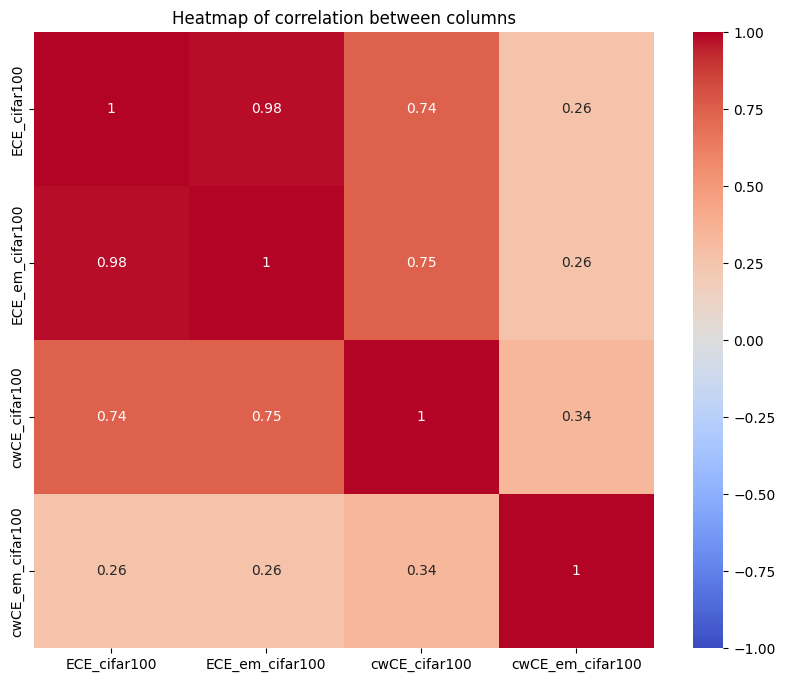

In [82]:


correlation_matrix = df_cifar100.sort_values('info', ascending=False).head(1000)[['ECE_cifar100', 'ECE_em_cifar100', 'cwCE_cifar100', 'cwCE_em_cifar100']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of correlation between columns')
plt.show()

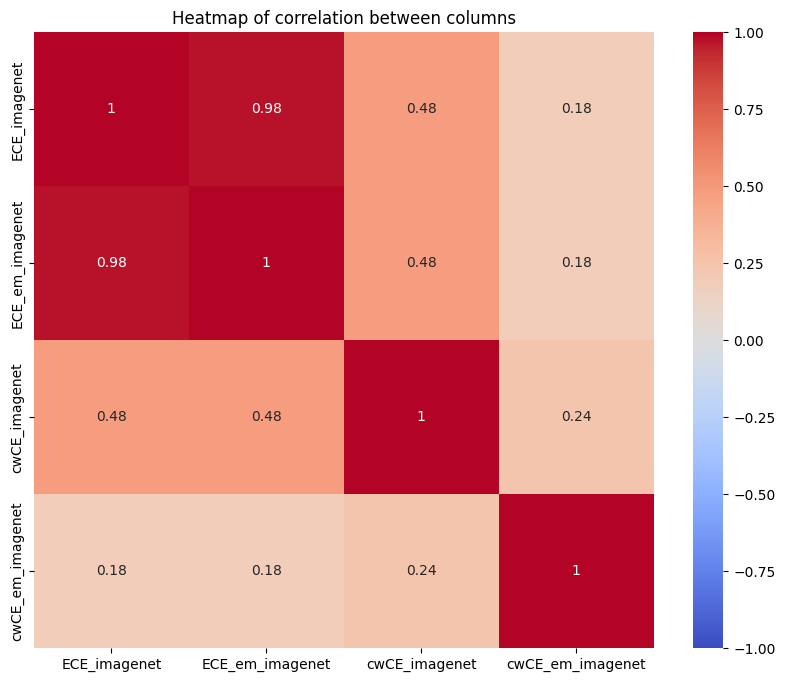

In [88]:


correlation_matrix = df_imagenet.sort_values('info', ascending=False).head(1000)[['ECE_imagenet', 'ECE_em_imagenet', 'cwCE_imagenet', 'cwCE_em_imagenet']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of correlation between columns')
plt.show()